In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
movies = pd.read_csv("/content/my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [9]:
#lets Remove first 5 columns.
movies1 = movies.drop(movies.iloc[:,0:5],axis=1)
movies1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


#Apriori Algorithm

# with minimum support 50%,confidence 70% and lift >1.

In [10]:
#with minimum support 0.5
frequent_itemsets = apriori(movies1, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


5 itemssets having support more than 50%.

In [11]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


#rules:
#if user watches Patriot then he will watch Gladiator with support 60%, confidence 100% and lift 1.42.
# if user(Sixth Sense) then (Gladiator) with support 0.5 confidence 0.8 and lift 1.19.

#with minimum support 20%,confidence 60% and lift >1.

In [12]:
#with minimum support 0.2
frequent_itemsets = apriori(movies1, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


12 itemssets observerd with support more than 20%

In [13]:
# with minmum confidence 60%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [17]:
# fetching first 5 records based on high lift ratio
rules.sort_values('lift',ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


#rules:
#if use watched LOTR1 then he will watch LOTR2 with supoort 20% confidence 100% and lift ratio 5.
#if user watched Green Mile then he will watch Sixth Sense with support 20% confidence 100% and lift Ratio 5.
#if user watched Gladiator then he will watch Patriot with support 60% confidence 85% and lift Ratio 1.42.

In [18]:
# hence we can say rules will change with changing support , confidence and lift Ratio values.

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

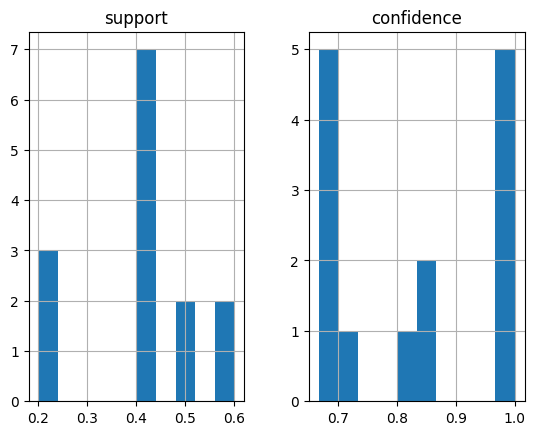

In [19]:
rules[['support','confidence']].hist()

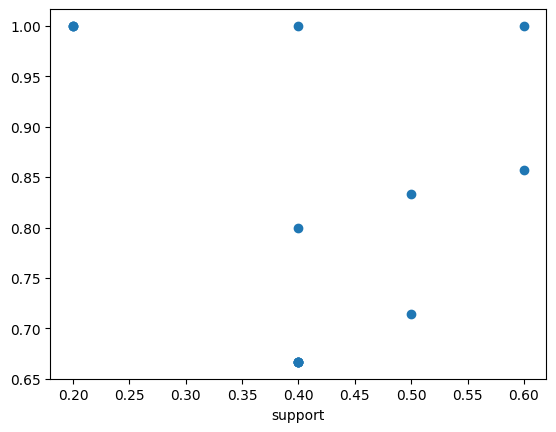

In [20]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel("support")
plt.show()

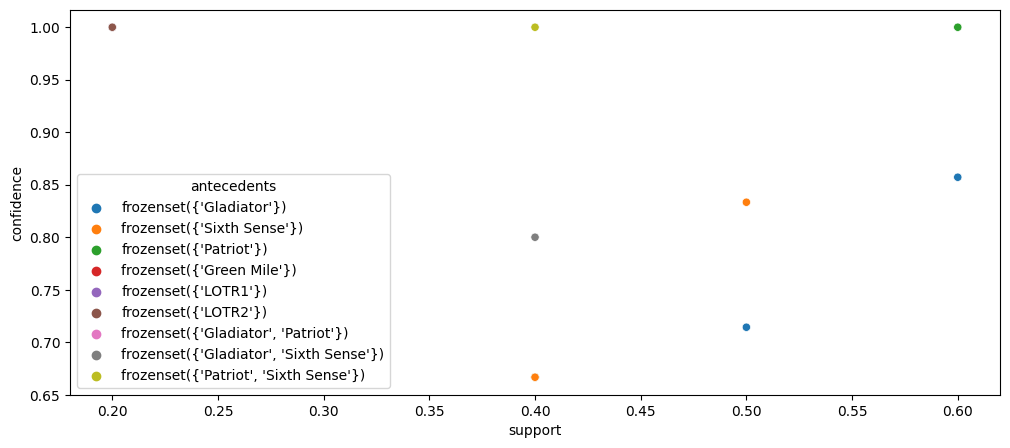

In [28]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.show()